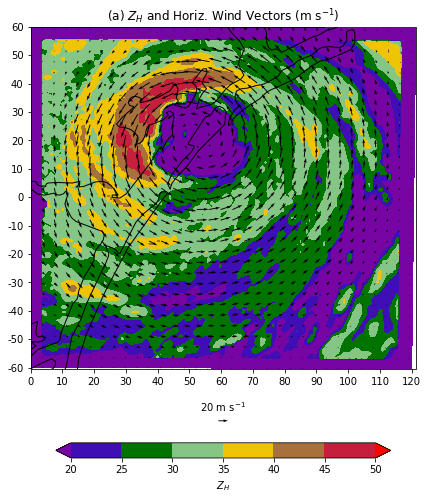

In [37]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
from matplotlib import rc
import pyart
from matplotlib.ticker import MultipleLocator

rc('figure',facecolor='white')

# Open the NetCDF file and extract the data
dd = xr.open_dataset('/Users/robertfrost/Documents/boomsoon/2023_semester_1/research_comm/hw3/grl_archive/DDA_0320_1.0.nc')
lat,lon,time = np.load('/Users/robertfrost/Documents/boomsoon/2023_semester_1/research_comm/hw3/grl_archive/time_dd_max_wind_harvey.npy')
data = dd.MAXDBZ.isel(NZ=2)
u = dd.U
v = dd.V


# Create a new figure and axis with a Robinson projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,9))

# Add coastlines and gridlines
ax.coastlines()

# colormap
cmap = pyart.graph.cm.Carbone42

# Plot the data as contours
clevs = [20, 25, 30, 35, 40, 45, 50]
contourf = ax.contourf(lon, lat, data.T, clevs,
                       transform=ccrs.PlateCarree(), 
                       cmap=cmap, alpha=1, extend="both")

# Add a colorbar
cbar = plt.colorbar(contourf, orientation='horizontal', shrink=0.5)
cbar.set_label('$Z_H$')

# Set the title
plt.title('(a) $Z_H$ and Horiz. Wind Vectors (m s$^{-1}$)', loc="center")

# set white face color
ax.set_facecolor(color="white")

# Set the x-axis tick locations
xtick_locs = np.linspace(min(lon[0,:]), max(lon[0,:]), num=13)
ax.set_xticks(xtick_locs)
# Set the x-axis tick labels
xtick_labels = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110', '120']
ax.set_xticklabels(xtick_labels)

# Set the y-axis tick locations
ytick_locs = np.linspace(min(lat[:,0]), max(lat[:,0]), num=13)
ax.set_yticks(ytick_locs)
# Set the y-axis tick labels
ytick_labels = ['-60', '-50', '-40', '-30', '-20', '-10', '0', '10', '20', '30', '40', '50', '60']
ax.set_yticklabels(ytick_labels)

# Wind barbs
spacing=4 #barbspacing (smaller if zoomed in)
quiver = ax.quiver(lon[::spacing,::spacing], lat[::spacing,::spacing], u[::spacing,::spacing,2].T, v[::spacing,::spacing,2].T)
ax.quiverkey(quiver, X=.5, Y=-0.15, U=40, label="20 m s$^{-1}$")

# Show the plot
plt.show()


In [4]:
dd

<xarray.Dataset>
Dimensions:  (NX: 130, NY: 130, NZ: 10)
Dimensions without coordinates: NX, NY, NZ
Data variables:
    X        (NX) float64 ...
    Y        (NY) float64 ...
    Z        (NZ) float64 ...
    U        (NX, NY, NZ) float64 ...
    V        (NX, NY, NZ) float64 ...
    W        (NX, NY, NZ) float64 ...
    CVG      (NX, NY, NZ) float64 ...
    CVG2     (NX, NY, NZ) float64 ...
    MAXDBZ   (NX, NY, NZ) float64 ...